In [86]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.regressionplots import influence_plot 
import statsmodels.formula.api as smf 
import numpy as np 

In [87]:
df=pd.read_csv('50_Startups.csv')
df.head()
pd.set_option('display.max_rows',None)
df

,RD,AT,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   AT      50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


##### 

In [89]:
df.isna().sum()

RD        0
AT        0
MS        0
State     0
Profit    0
dtype: int64

In [90]:
df.corr()

,RD,AT,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
AT,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


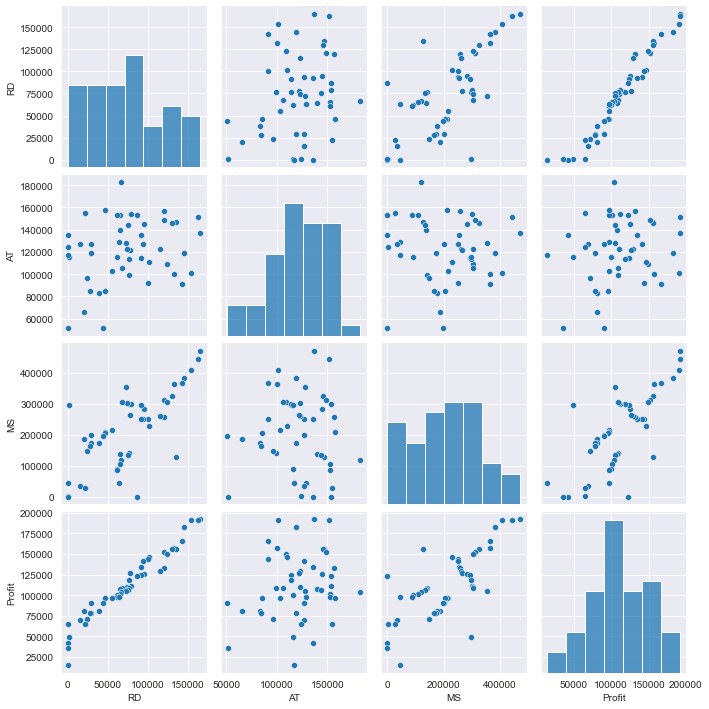

In [91]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [92]:
#preparing a model

In [93]:
#build model
import statsmodels.formula.api as smf
model = smf.ols('Profit~RD+AT+MS',data=df).fit()


In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        18:58:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
AT            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
#coefficients
model.params

Intercept    50122.192990
RD               0.805715
AT              -0.026816
MS               0.027228
dtype: float64

In [96]:
#t and p values
print(model.tvalues, '/n', model.pvalues)

Intercept     7.626218
RD           17.846374
AT           -0.525507
MS            1.655077
dtype: float64 /n Intercept    1.057379e-09
RD           2.634968e-22
AT           6.017551e-01
MS           1.047168e-01
dtype: float64


In [97]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [98]:
ml_v=smf.ols('Profit~RD+AT+MS',data=df).fit()
#t and p-values
print(ml_v.tvalues, '/n', ml_v.pvalues)

Intercept     7.626218
RD           17.846374
AT           -0.525507
MS            1.655077
dtype: float64 /n Intercept    1.057379e-09
RD           2.634968e-22
AT           6.017551e-01
MS           1.047168e-01
dtype: float64


In [99]:
Simple linear

SyntaxError: invalid syntax (2008732588.py, line 1)

In [100]:
ml_v=smf.ols('Profit~AT',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    3.040044
AT           1.419493
dtype: float64 
 Intercept    0.003824
AT           0.162217
dtype: float64


In [101]:
ml_w=smf.ols('Profit~MS',data = df).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [102]:
ml_wv=smf.ols('Profit~AT+MS',data = df).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues) 

Intercept    1.142741
AT           2.467779
MS           8.281039
dtype: float64 
 Intercept    2.589341e-01
AT           1.729198e-02
MS           9.727245e-11
dtype: float64


In [103]:
Calculating VIF

SyntaxError: invalid syntax (828651575.py, line 1)

In [104]:
rsq_rd = smf.ols('RD~AT+MS',data=df).fit().rsquared  
vif_rd = 1/(1-rsq_rd) 

rsq_at = smf.ols('AT~MS+RD',data=df).fit().rsquared  
vif_at = 1/(1-rsq_at) 

rsq_ms = smf.ols('MS~RD+AT',data=df).fit().rsquared  
vif_ms = 1/(1-rsq_ms) 

# Storing vif values in a data frame
d1 = {'Variables':['RD','AT','MS'],'VIF':[vif_rd,vif_at,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,RD,2.468903
1,AT,1.175091
2,MS,2.326773


In [ ]:
Residual analysis
Test for Normality of Residuals(Q_Q plot)

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
Residual plot for Homoscedasticity

In [ ]:
def get_standardizes_values(vals):
    return(vals - vals.mean())/vals.std()

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
Residual VS regressions

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "AT", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

In [ ]:
Model Deletion Diagnostics
Deleting influencers/Ojutliers
Cooks Distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

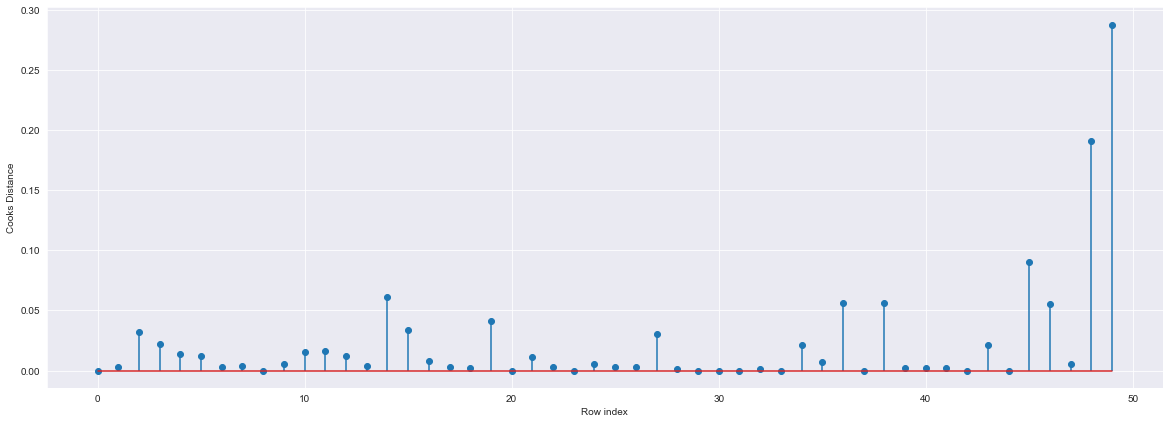

In [105]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [106]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [ ]:
Model Deletion Diagnostics 
Deleting influencers / outliers
cooks distance

In [107]:
model_influence=model.get_influence()
(c, _)=model_influence.cooks_distance

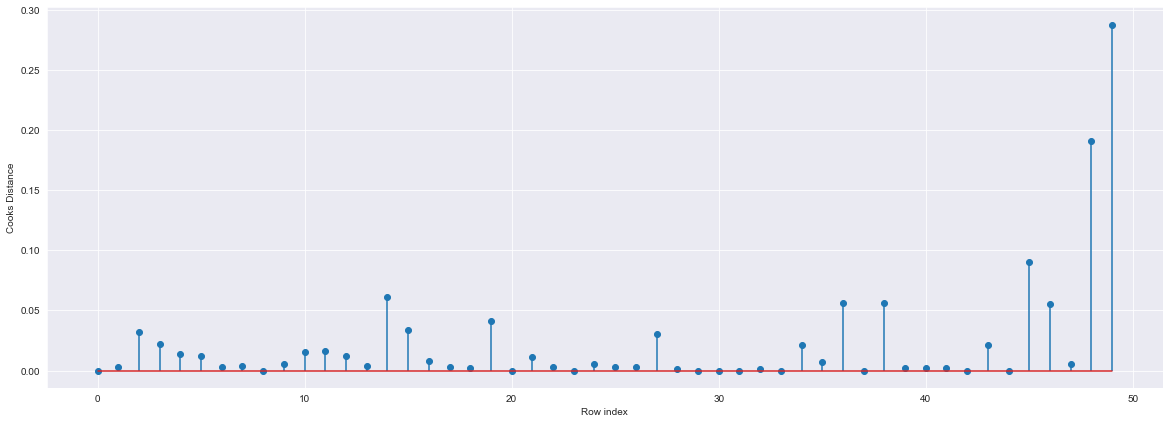

In [108]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
High influence points

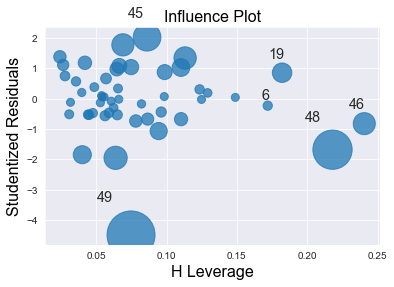

In [109]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [110]:
k=3
n=df.shape[0]
leverage_cutoff = 2*((k+1)/n)
leverage_cutoff

0.16

In [ ]:
From  the above plot,it is evident that data point 45 and 49 are the influencers

In [111]:
df[df.index.isin([45,49])]

,RD,AT,MS,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
49,0.00,116983.80,45173.06,California,14681.40


In [112]:
#see the difference in Hp and other variable values
df.head()

,RD,AT,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
improving the model

In [113]:
#Load the data
df_new = pd.read_csv("50_Startups.csv")

In [ ]:
#Discard the data points which are influencers and resign te row number(reset_influencers)

In [114]:
df=df_new.drop(df_new.index[[45,49]],axis=0).reset_index()

In [ ]:
#drop the original index
df1= df.drop(['index'],axis=1)

In [115]:
df1

,RD,AT,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
Build a model

In [116]:
#Exclude variable "MS" and generate R-Squared and AIC values
final_ml_A= smf.ols('Profit~AT+RD',data = df).fit()

In [117]:
(final_ml_A.rsquared,final_ml_A.aic,final_ml_A.bic)

(0.9596782332232935, 999.1635018259686, 1004.7771048586923)

In [ ]:
#Exclude variable "AT" and generate R-Squared and AIC values
final_ml_M= smf.ols('Profit~MS+RD',data = df).fit()

In [ ]:
(final_ml_M.rsquared,final_ml_M.aic,final_ml_M.bic)

In [ ]:
cooks distance

In [118]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

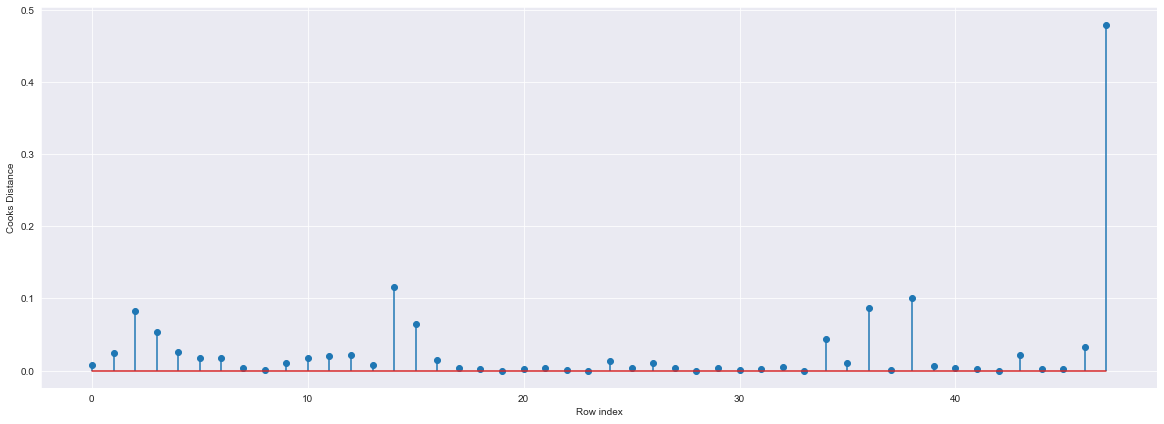

In [119]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#Drop 45
df2=df1.drop(df1.index[[45]],axis=0)

In [120]:
df2

,RD,AT,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [130]:
#Reset the index and re arrange the row values
df3=df2.reset_index()

In [129]:
df4=df3.drop(['index'],axis=1)

In [128]:
df4

,RD,AT,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [133]:
#Build the model on the new data
final_ml_V= smf.ols('Profit~RD+AT+MS',data = df4).fit()

In [134]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

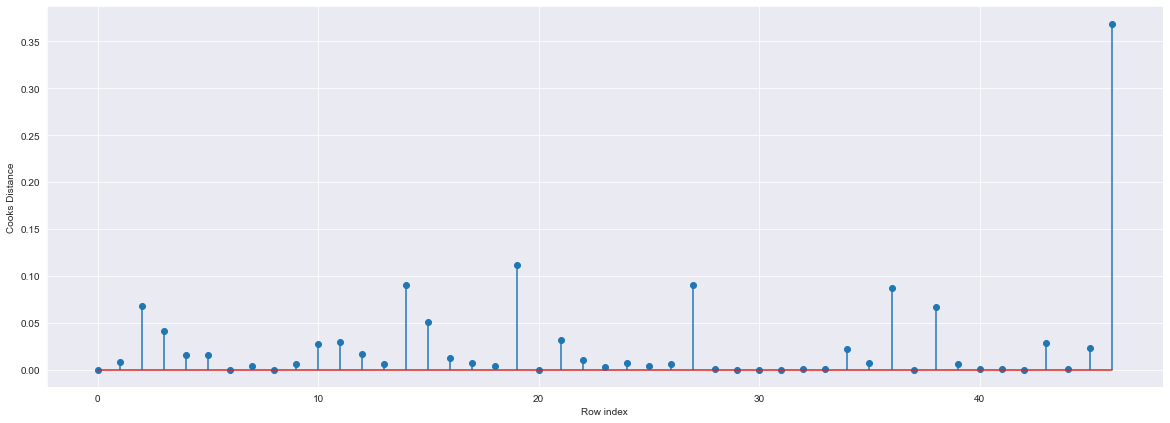

In [136]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [137]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(46, 0.3689969488012905)

In [139]:
df5=df4.drop(df1.index[[46]],axis=0)
df5

,RD,AT,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
car6=car5.reset_index()
car6 
#car6=car5.drop(['index'],axis=1)

In [ ]:
car7=car6.drop(['index'],axis=1)
car7 

In [ ]:
Since the value is <1 , we can stop the diagnostic process and finalize the model

In [ ]:
v#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car7).fit()